Notebook to determine the temporal and spatial coverage of IOS data that Rich has stored.


Data is stored in several directories: 

* /ocean/rich/home/SoG/ios/che/
* /ocean/rich/home/SoG/ios/che2
* /ocean/nsoontie/MEOPAR/IOS/2011/
* /ocean/nsoontie/MEOPAR/IOS/2013/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import datetime
import pandas as pd
import netCDF4 as nc

from salishsea_tools.nowcast import figures
from salishsea_tools import viz_tools
%matplotlib inline

In [2]:
#Load NEMO grid
f = '/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc'
grid = nc.Dataset(f)

#Loading data

In [3]:
def read_IOS(filename):
    """Funtion to read IOS data in filename. Only good for reading lat, lon and date """
    filehandle = open(filename,'rt')
    with filehandle as data:
            headerover = False
            for line in data:
                if headerover:
                    break
                    word = line.split()
                elif line[0:14] == "*END OF HEADER":
                    headerover = True
                else:
                    word = line.split()
                    if len(word) > 1:
                        if word[0] == "LATITUDE" and word[1] !='2':
                            lat = float(word[2])+ float(word[3])/60
                        if word[0] == "LONGITUDE" and word[1] !='2':
                            lon = -(float(word[2])+ float(word[3])/60)
                        if word[0] == "START":
                            string = word[4] +' ' + word[5]
                            time = datetime.datetime.strptime(string,'%Y/%m/%d %H:%M:%S.%f')
    return lat,lon,time

Loop through files in first directory.

In [4]:
ios_dir = '/ocean/rich/home/SoG/ios/che/'
files = glob.glob(os.path.join(ios_dir,'*'))
files.sort(key=os.path.basename)
#new IOS data (may have repeats)
files2 = glob.glob(os.path.join('/ocean/nsoontie/MEOPAR/IOS/2011/','*'))
files2.sort(key=os.path.basename)
files.extend(files2)
#another new source
files3=glob.glob(os.path.join('/ocean/nsoontie/MEOPAR/IOS/2013/','*'))
files3.sort(key=os.path.basename)
files.extend(files3)

In [5]:
times = []
lats=[]
lons=[]
years = []
months = []
counter = 0
for filename in files:
    lat,lon,time = read_IOS(filename)
    times.append(time)
    lats.append(lat)
    lons.append(lon)
    years.append(time.year)
    months.append(time.month)
    counter=counter+1
#Check number of files looked at
print counter
print len(files)

2481
2481


Loop through files in second directory

In [6]:
ios_dir = '/ocean/rich/home/SoG/ios/che2/'
files = glob.glob(os.path.join(ios_dir,'*'))
files.sort(key=os.path.basename)

In [7]:
counter=0
for filename in files:
    lat,lon,time= read_IOS(filename)
    times.append(time)
    lats.append(lat)
    lons.append(lon)
    years.append(time.year)
    months.append(time.month)
    counter=counter+1
print counter
print len(files)

477
477


Add position and dates to a data frame.

In [8]:
data = pd.DataFrame({'year': years, 'date': times, 'lat':lats, 'lon': lons,'month':months})

#Plotting

Where and when do we have data?

year
1980      2
1981      1
1982      3
1983      1
1995      1
1996     53
1997     50
1998     60
1999     17
2000     37
2001     49
2002     63
2003     59
2004     63
2005     52
2006     63
2007     50
2008     50
2009     99
2010    127
2011    685
2012    595
2013    424
2014    354
dtype: int64


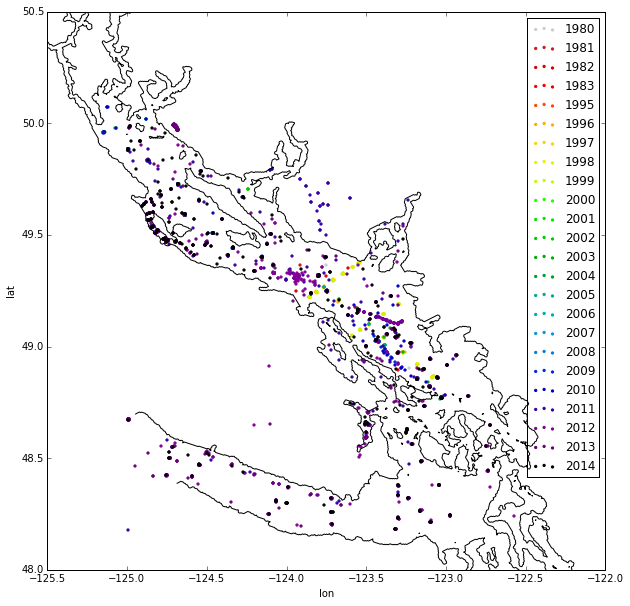

In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
# Group the data by year
grouped = data.groupby('year')
# Grab the keys of this group, (years) and sort 
y = grouped.groups.keys()
y.sort()
#create a colour map for plotting each year a different colour
num_groups = grouped.ngroups
cmap = cm.get_cmap('spectral_r',num_groups)
#iterate through the years an plot location. Give each year a different colour
count = 0
for year in y:
    g = grouped.get_group(year)
    g.plot(x='lon',y='lat',kind='scatter',marker='.',ax=ax,label=year,color=cmap(count))
    count=count+1
viz_tools.plot_coastline(ax,grid,coords='map')
ax.set_xlim([-125.5,-122])
ax.set_ylim([48,50.5])

print grouped.size() #shows number of data points in each year

* Points on land? I think the model is missing some of those inlets (Sechelt)
* Lots of points in 2011 because of duplicates. Rob's function can take care of that

During which months?

month
1      49
2     187
3      94
4     857
5      69
6     607
7     209
8     107
9     421
10     98
11    127
12    133
dtype: int64


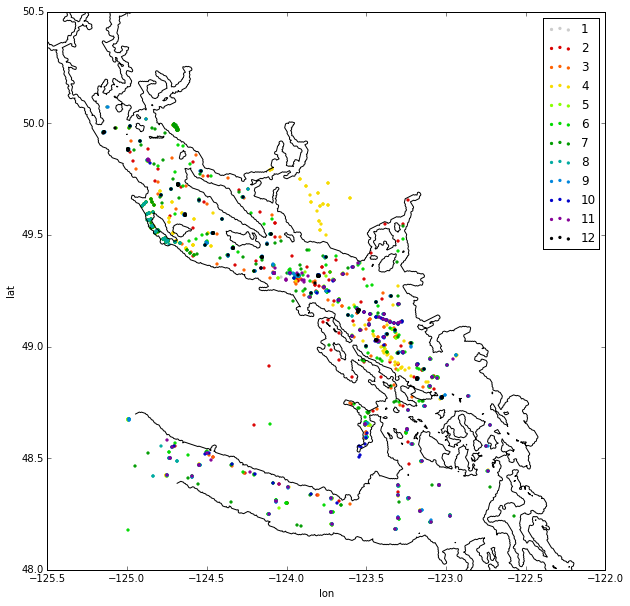

In [10]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
# Group the data by month
grouped = data.groupby('month')
# Grab the keys of this group, (years) and sort 
m = grouped.groups.keys()
m.sort()
#create a colour map for plotting each year a different colour
num_groups = grouped.ngroups
cmap = cm.get_cmap('spectral_r',num_groups)
#iterate through the years an plot location. Give each year a different colour
count = 0
for mon in m:
    g = grouped.get_group(mon)
    g.plot(x='lon',y='lat',kind='scatter',marker='.',ax=ax,label=mon,color=cmap(count))
    count=count+1
viz_tools.plot_coastline(ax,grid,coords='map')
ax.set_xlim([-125.5,-122])
ax.set_ylim([48,50.5])

print grouped.size() #show number of data point in each month